In [1]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set()

# Task 1-2

In [2]:
# creating our neural network only using numpy
def pred_nn(weights, x_test):
  a1 = np.maximum(0, ((weights[0].T).dot(x_test.T)) + weights[1].reshape(-1,1))
  a2 = np.maximum(0, ((weights[2].T).dot(a1)) + weights[3].reshape(-1,1))
  a3 = np.maximum(0, ((weights[4].T).dot(a2)) + weights[5].reshape(-1,1))
  predictions = np.exp(((weights[6].T).dot(a3)) + weights[7].reshape(-1,1)) / np.sum(np.exp(((weights[6].T).dot(a3)) + weights[7].reshape(-1,1)), axis=0)
  
  return predictions.T

# Task 3

In [3]:
# creating the same neural network in tensorflow
model = keras.Sequential()
model.add(keras.layers.Dense(750, activation='relu', input_dim=784))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
weights = np.load('weights.npy', allow_pickle=True)

# Task 4-5

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
# reshaping the images
x_train = x_train.reshape(60000, 28*28)/255
x_test = x_test.reshape(10000, 28*28)/255

x_train.shape, x_test.shape, x_train.min(), x_train.max()

((60000, 784), (10000, 784), 0.0, 1.0)

In [7]:
# one-hot encoding the labels
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# training the tensorflow model
history = model.fit(x=x_train, y=y_train_oh, batch_size=64, epochs=15, validation_data=(x_test, y_test_oh))

Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1960 - accuracy: 0.9404 - val_loss: 0.0963 - val_accuracy: 0.9690
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.0819 - accuracy: 0.9751 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 3/15
938/938 [==============================] - 2s 3ms/step - loss: 0.0579 - accuracy: 0.9817 - val_loss: 0.0827 - val_accuracy: 0.9761
Epoch 4/15
938/938 [==============================] - 2s 3ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0864 - val_accuracy: 0.9766
Epoch 5/15
938/938 [==============================] - 2s 3ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0747 - val_accuracy: 0.9788
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0960 - val_accuracy: 0.9768
Epoch 7/15
938/938 [==============================] - 2s 3ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0923 - val_accuracy: 0.9759
Epoch 

In [10]:
# predicting the x_test values with the tensorflow model
preds1 = model.predict(x_test)

In [11]:
# predicting the x_test values with our model
preds2 = pred_nn(weights, x_test)

In [12]:
# categorical cross-entropy loss of tensorflow model
cce = keras.losses.CategoricalCrossentropy()
print('categorical cross-entropy loss of tensorflow model:',cce(y_test_oh, preds1).numpy())
print('categorical cross-entropy loss of our model:',cce(y_test_oh, preds2).numpy())

categorical cross-entropy loss of tensorflow model: 0.08291199
categorical cross-entropy loss of our model: 0.09585708379745483


In [13]:
# accuracy of tensorflow model
print('accuracy of tensorflow model:',accuracy_score(y_test, np.argmax(preds1, axis=1)))
print('accuracy of our model:',accuracy_score(y_test, np.argmax(preds2, axis=1)))

accuracy of tensorflow model: 0.9825
accuracy of our model: 0.9708


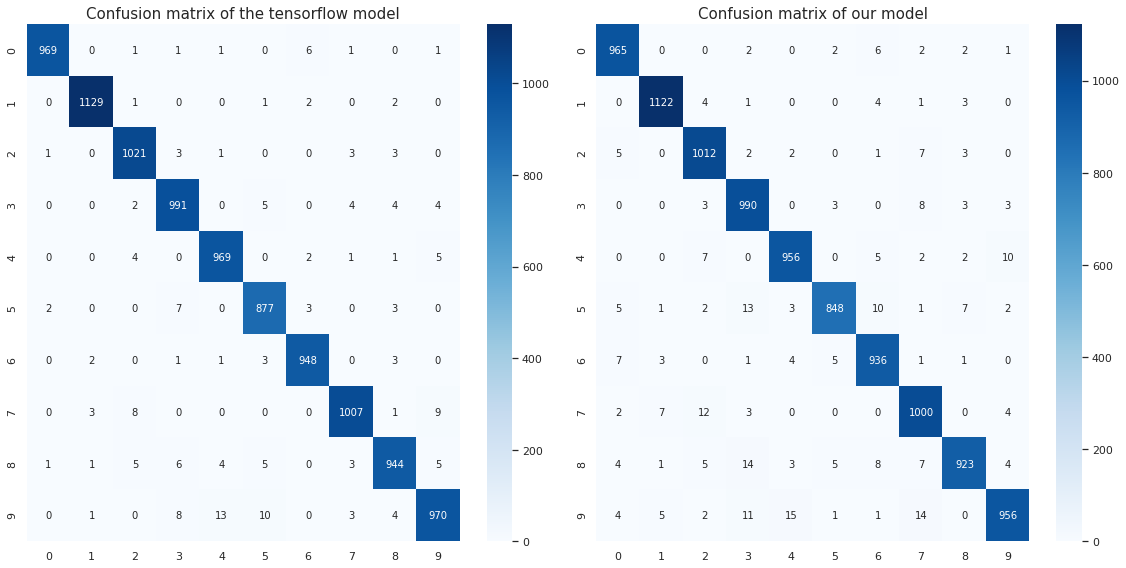

In [14]:
cm1 = confusion_matrix(y_test, np.argmax(preds1, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm2 = confusion_matrix(y_test, np.argmax(preds2, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix of the tensorflow model', size=15)
plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix of our model', size=15)

plt.tight_layout()

In the confusion matrix we can see that the tensorflow model confuses the number 9 and 4 the most. While out model makes a little bit more mistakes. It confuses the number 9 and 4, 9 and 7, 8 and 3 the most. These numbers are similar in shape and can be confused depending on the style of the handwriting.